# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [76]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [77]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### What is the distribution of the outcome? 

Class 0: 6354407
Class 1: 8213
Proportion: 773.7 : 1


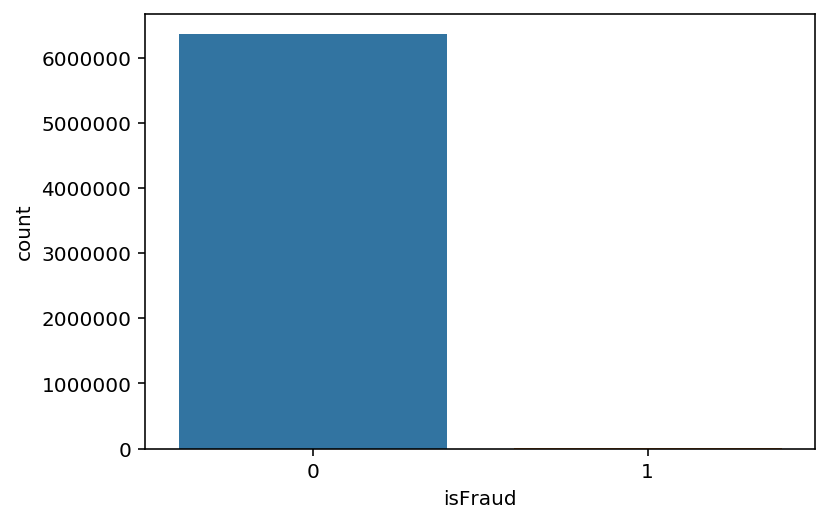

In [78]:
# Your response here
distr_fraud = df.isFraud.value_counts()
print('Class 0:', distr_fraud[0])
print('Class 1:', distr_fraud[1])
print('Proportion:', round(distr_fraud[0] / distr_fraud[1], 2), ': 1')
sns.countplot(df.isFraud)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [79]:
# Time variable step:
"""integer is not the best choice here since this creates an order 1<2<3 and so on. 
For this analysis in which we want to predict the outcome frau or not, this variable is irrelevant for us."""

'integer is not the best choice here since this creates an order 1<2<3 and so on. \nFor this analysis in which we want to predict the outcome frau or not, this variable is irrelevant for us.'

In [80]:
# Your code here
df.dtypes

# check for nan
df.isnull().sum()

# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

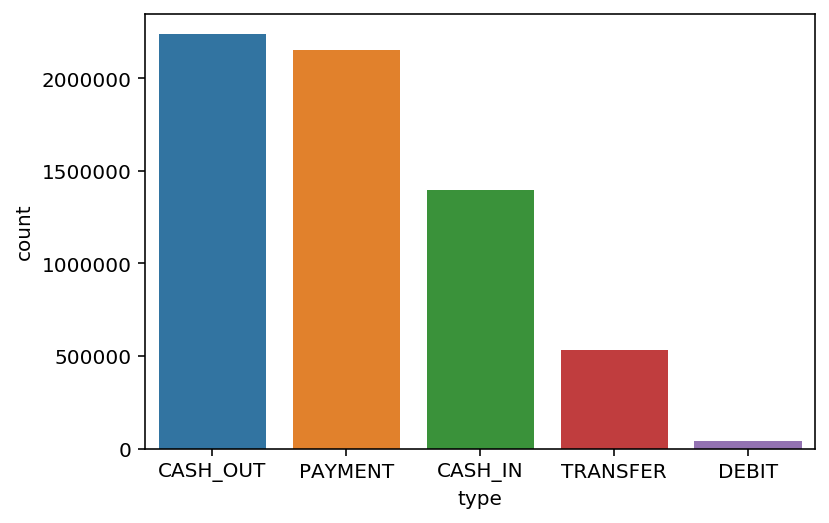

In [81]:
# Exploring Transfer types
df.type.value_counts()
sns.countplot(df.type,order = df.type.value_counts().index)

In [82]:
df_grouped = df.groupby('type').agg({'isFraud':'sum'})
df_grouped

,isFraud
type,
CASH_IN,0
CASH_OUT,4116
DEBIT,0
PAYMENT,0
TRANSFER,4097


In [83]:
# Dropping columns: Names(not interesting to us)
df_drop = df.drop(['nameOrig','nameDest','step'], axis=1)
df_drop.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [84]:
# dummies for type
df_drop = pd.get_dummies(df_drop, prefix=['type'])

In [85]:
df_drop.columns
df_drop.dtypes

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

In [86]:
# Statistics Summary - Numerical variables
df_drop.describe()
# Pairplot
#sns.pairplot(df_drop)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,2.199226e-01,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.141940e-01,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [87]:
# Correlation check
# Correlation mask >0.4:
#df_drop_corr = df_drop.corr()
#condition = abs(df_drop.corr()) > 0.4
#df_drop.corr()[condition]

In [88]:
# also dropping newbalance Orig and Dest because we are more interested in how the original value affects fraud
df_drop = df_drop.drop(['newbalanceOrig','newbalanceDest'], axis=1)

### Run a logistic regression classifier and evaluate its accuracy.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([0, 0, 0, 0, 0])

The accuracy score for the training data is:  99.87157413141128
The accuracy score for the test data is:  99.86829325026483
**************************************************


array([[1270848,       0],
       [   1676,       0]])

Text(0.5, 1.1, 'Confusion matrix')

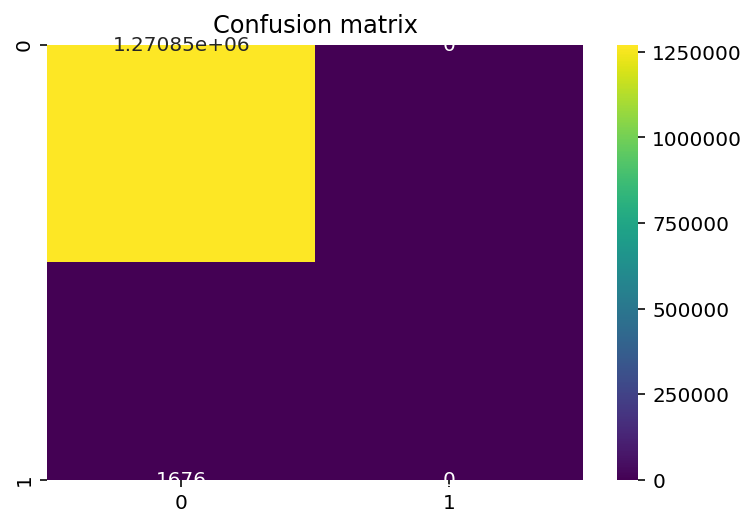

In [89]:
# Your code here

# Test-Train Split
# clarify what is y and what is x label
y = df_drop['isFraud']
X = df_drop.drop(['isFraud'], axis = 1)

# divide train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29) #random_state<-- any number

In [94]:
# Downsampling:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
no_fraud = X[X.isFraud==0]
fraud = X[X.isFraud==1]
# downsample majority
no_fraud_downsampled = resample(no_fraud,
                               replace = False, # sample without replacement
                               n_samples = len(fraud), # match minority n
                               random_state = 27) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([no_fraud_downsampled, fraud])
# checking counts
downsampled.isFraud.value_counts()

1    6537
0    6537
Name: isFraud, dtype: int64

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([1, 1, 0, 1, 1])

The accuracy score for the training data is:  67.2097292335934
The accuracy score for the test data is:  42.89781567970427


array([[544373, 726475],
       [   164,   1512]])

Text(0.5, 1.1, 'Confusion matrix')

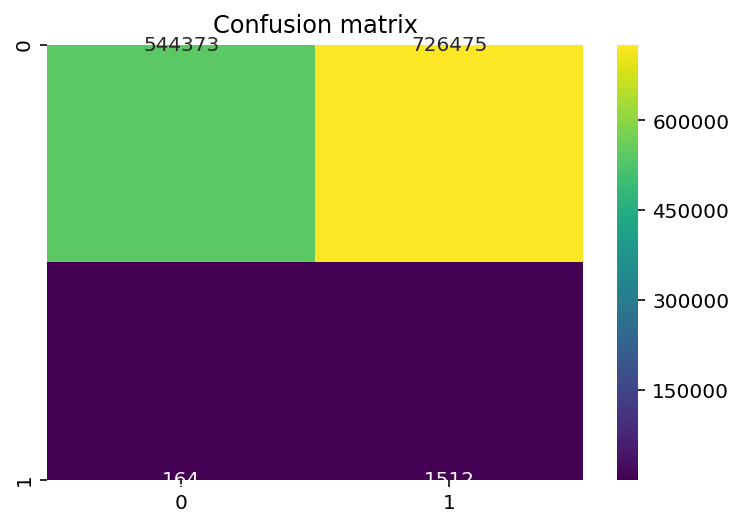

In [97]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

# trying logistic regression again with the oversampled balanced dataset
y_train = downsampled['isFraud']
X_train = downsampled.drop('isFraud', axis=1)

#initialize model
lr = LogisticRegression() 

# fit model (train model)
lr.fit(X_train,y_train) 

# predict (test model)
y_pred = lr.predict(X_test)

# See predictions
y_pred[0:5]


# plot
#plt.scatter(y_test, y_pred)
#plt.xlabel(“True Values”)
#plt.ylabel(“Predictions”)

# check accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

acc_train = lr.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",acc_train)
acc_test = lr.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",acc_test)
#acc = lr.score(y_test,y_pred)*100

#print("Accuracy:",lr.metrics.accuracy_score(y_test, y_pred))
#print("Precision:",lr.metrics.precision_score(y_test, y_pred))
#print("Recall:",lr.metrics.recall_score(y_test, y_pred))


#Confusion Matrix

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)


### Now pick a model of your choice and evaluate its accuracy.

In [106]:
# Your code here
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#initialize model
dtc = DecisionTreeClassifier()
# fit model (train model)
dtc.fit(X_train, y_train)
# predict (test model)
y_pred_dtc = dtc.predict(X_test)
# check accuracy
acc_dtc_test = dtc.score(X_test, y_test)*100
acc_dtc_train = dtc.score(X_train,y_train)*100
print("The accuracy score for the train data is: ",acc_dtc_train)

print(f"Decision Tree Test Accuracy {round(acc_dtc_test, 2)}%")


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The accuracy score for the train data is:  100.0
Decision Tree Test Accuracy 97.98%


array([[1244807,   26041],
       [     29,    1647]])

Text(0.5, 1.1, 'Confusion matrix')

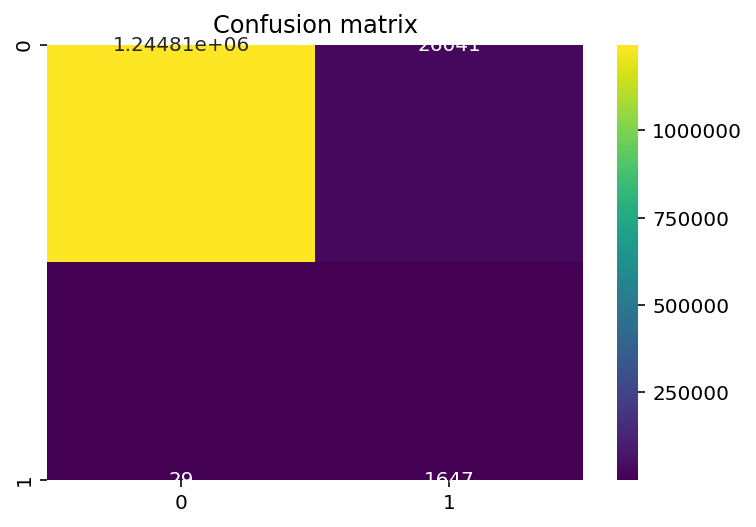

In [101]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

cnf_matrix2 = confusion_matrix(y_test, y_pred_dtc)
cnf_matrix2

sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="viridis" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

### Which model worked better and how do you know?

In [92]:
# Your response here
# DTC works much better works a lot better